In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import datetime as dt
import time
import numpy as np
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from requests.packages.urllib3.util import Retry
from requests.adapters import HTTPAdapter
from requests import Session, exceptions

In [2]:
headlines_page = requests.get("http://www.espn.com/nba/news/archive/_/month/january/year/2020")
soup = BeautifulSoup(headlines_page.content,'lxml')

In [3]:
headline_title = soup.find_all("li")
headline_title

[<li><a href="http://www.espn.com/nba/story/_/id/28610796/kyrie-irving-puts-54-points-chicago-bulls-kobe-mentality" title="Kyrie puts 54 points on the Bulls with 'Kobe mentality'">Kyrie puts 54 points on the Bulls with 'Kobe mentality'</a> (February 1, 2020, 2:41 AM ET)</li>,
 <li><a href="http://www.espn.com/nba/preview?gameId=401161373" title="Hot-shooting Irving, Nets visit Wizards">Hot-shooting Irving, Nets visit Wizards</a> (February 1, 2020, 2:04 AM ET)</li>,
 <li><a href="http://www.espn.com/nba/story/_/id/28607660/the-lakers-blazers-put-show-honoring-kobe-bryant" title="The Lakers and Blazers put on a show in honoring Kobe Bryant">The Lakers and Blazers put on a show in honoring Kobe Bryant</a> (February 1, 2020, 2:03 AM ET)</li>,
 <li><a href="http://www.espn.com/nba/story/_/id/28610751/zion-williamson-swaps-jerseys-ja-morant-dominating-grizzlies" title="Zion swaps jerseys with Ja after dominating Grizz">Zion swaps jerseys with Ja after dominating Grizz</a> (February 1, 2020, 

In [4]:
titles_list = [headline_title[i].text for i in range(0,len(headline_title))] 
titles_list #preview the list

["Kyrie puts 54 points on the Bulls with 'Kobe mentality' (February 1, 2020, 2:41 AM ET)",
 'Hot-shooting Irving, Nets visit Wizards (February 1, 2020, 2:04 AM ET)',
 'The Lakers and Blazers put on a show in honoring Kobe Bryant (February 1, 2020, 2:03 AM ET)',
 'Zion swaps jerseys with Ja after dominating Grizz (February 1, 2020, 2:00 AM ET)',
 "Kyrie uses 'Mamba mentality' to drop 54 on Bulls (February 1, 2020, 1:43 AM ET)",
 'LeBron reveals Black Mamba tattoo saluting Kobe (February 1, 2020, 1:31 AM ET)',
 "Pelicans' Hayes sorry for vulgar Rising Stars rant (February 1, 2020, 1:28 AM ET)",
 "Giannis starts with brother for Bucks' Greek Night (February 1, 2020, 1:27 AM ET)",
 'Barton, Nuggets hand Bucks rare defeat at home, 127-115 (February 1, 2020, 1:08 AM ET)',
 'Thunder rally in final minutes, push past Suns 111-107 (February 1, 2020, 12:50 AM ET)',
 "Raptors' Nurse to coach Team Giannis in ASG (February 1, 2020, 12:19 AM ET)",
 'Zion scores 24, Pelicans pound Memphis 139-111 (Fe

In [5]:
headlines_only_list = []
for item in titles_list:
    if '(' and ')' not in item:
        continue
    else:
        headlines_only_list.append(item)

In [6]:
headlines_only_list


["Kyrie puts 54 points on the Bulls with 'Kobe mentality' (February 1, 2020, 2:41 AM ET)",
 'Hot-shooting Irving, Nets visit Wizards (February 1, 2020, 2:04 AM ET)',
 'The Lakers and Blazers put on a show in honoring Kobe Bryant (February 1, 2020, 2:03 AM ET)',
 'Zion swaps jerseys with Ja after dominating Grizz (February 1, 2020, 2:00 AM ET)',
 "Kyrie uses 'Mamba mentality' to drop 54 on Bulls (February 1, 2020, 1:43 AM ET)",
 'LeBron reveals Black Mamba tattoo saluting Kobe (February 1, 2020, 1:31 AM ET)',
 "Pelicans' Hayes sorry for vulgar Rising Stars rant (February 1, 2020, 1:28 AM ET)",
 "Giannis starts with brother for Bucks' Greek Night (February 1, 2020, 1:27 AM ET)",
 'Barton, Nuggets hand Bucks rare defeat at home, 127-115 (February 1, 2020, 1:08 AM ET)',
 'Thunder rally in final minutes, push past Suns 111-107 (February 1, 2020, 12:50 AM ET)',
 "Raptors' Nurse to coach Team Giannis in ASG (February 1, 2020, 12:19 AM ET)",
 'Zion scores 24, Pelicans pound Memphis 139-111 (Fe

In [7]:
txt = headlines_only_list[0]
pattern = '\((.*)\)'
x = re.search(pattern, txt)
x.group().replace('(', '').replace(')', '')



'February 1, 2020, 2:41 AM ET'

In [8]:
txt2 = headlines_only_list[0]
pattern = '\((.*)\)'
new_string = re.sub(pattern, repl='', string=txt2)
new_string.strip()

"Kyrie puts 54 points on the Bulls with 'Kobe mentality'"

In [9]:
start_num = headlines_only_list[0].rfind('(')
end_num = headlines_only_list[0].rfind(')')

headlines_only_list[0][start_num+1:end_num]

'February 1, 2020, 2:41 AM ET'

In [10]:
headlines_only_list[0][:start_num].strip()

"Kyrie puts 54 points on the Bulls with 'Kobe mentality'"

In [11]:
def clean_headlines(headline_list):
    rm_timestamp_list = [] #create empty list for headlines without timestamps
    timestamps_list = []   #create empty list for timestamps of headlines
    for i in headline_list:
        timestamp_start = i.rfind('(') #assign index value of last open parentheses to variable
        timestamp_end = i.rfind(')')   #assign index value of last closed parentheses to variable
        last_comma = i.rfind(',')      #assign index value of last comma to  a variable
        
        rm_timestamp_list.append(i[:timestamp_start].strip())
        
        timestamps_list.append(i[timestamp_start+1:last_comma])
        
        
    return rm_timestamp_list, timestamps_list
        
        

In [12]:
headlines_clean_list, timestamp_strings_list = clean_headlines(headlines_only_list)

In [13]:
headlines_clean_list

["Kyrie puts 54 points on the Bulls with 'Kobe mentality'",
 'Hot-shooting Irving, Nets visit Wizards',
 'The Lakers and Blazers put on a show in honoring Kobe Bryant',
 'Zion swaps jerseys with Ja after dominating Grizz',
 "Kyrie uses 'Mamba mentality' to drop 54 on Bulls",
 'LeBron reveals Black Mamba tattoo saluting Kobe',
 "Pelicans' Hayes sorry for vulgar Rising Stars rant",
 "Giannis starts with brother for Bucks' Greek Night",
 'Barton, Nuggets hand Bucks rare defeat at home, 127-115',
 'Thunder rally in final minutes, push past Suns 111-107',
 "Raptors' Nurse to coach Team Giannis in ASG",
 'Zion scores 24, Pelicans pound Memphis 139-111',
 'Irving scores season-high 54, Nets beat Bulls 133-118',
 'Harden has 35 as Rockets beat Mavericks 128-121',
 "Raptors' streak at 10 after 105-92 win over Pistons",
 "Emotional Melo 'not ready,' to sit out vs. Lakers",
 'Spurs face critical game against hapless Hornets',
 "Mavs' Doncic has sprain, out at least 6 games",
 "Warriors, Cavs matc

In [14]:
df = pd.DataFrame({'headlines': headlines_clean_list, 'posted_time': timestamp_strings_list})
df.head()

,headlines,posted_time
0,Kyrie puts 54 points on the Bulls with 'Kobe m...,"February 1, 2020"
1,"Hot-shooting Irving, Nets visit Wizards","February 1, 2020"
2,The Lakers and Blazers put on a show in honori...,"February 1, 2020"
3,Zion swaps jerseys with Ja after dominating Grizz,"February 1, 2020"
4,Kyrie uses 'Mamba mentality' to drop 54 on Bulls,"February 1, 2020"


In [15]:
df['posted_time'] = pd.to_datetime(df['posted_time'], format='%B %d, %Y')

In [16]:
df.head()

,headlines,posted_time
0,Kyrie puts 54 points on the Bulls with 'Kobe m...,2020-02-01
1,"Hot-shooting Irving, Nets visit Wizards",2020-02-01
2,The Lakers and Blazers put on a show in honori...,2020-02-01
3,Zion swaps jerseys with Ja after dominating Grizz,2020-02-01
4,Kyrie uses 'Mamba mentality' to drop 54 on Bulls,2020-02-01


In [17]:
stopwords = nltk.corpus.stopwords.words('english')
wnl = WordNetLemmatizer()

In [18]:
def create_tokens(headline_string):
    
    no_punc_text = "".join([word for word in headline_string if word not in string.punctuation]) #remove punctuation
    tokens = re.split('\W+', no_punc_text) #split words by in no_punc_text variable by whitespace
    
    #Lemmatize each token and store tokens in a list
    final_tokens = [wnl.lemmatize(word) for word in tokens if word not in stopwords]
    
    return final_tokens

In [19]:
df['headline_tokens'] = df['headlines'].apply(lambda x: create_tokens(x))

In [20]:
#pd.set_option('display.max_colwidth', -1)
df.head(20)

,headlines,posted_time,headline_tokens
0,Kyrie puts 54 points on the Bulls with 'Kobe m...,2020-02-01,"[Kyrie, put, 54, point, Bulls, Kobe, mentality]"
1,"Hot-shooting Irving, Nets visit Wizards",2020-02-01,"[Hotshooting, Irving, Nets, visit, Wizards]"
2,The Lakers and Blazers put on a show in honori...,2020-02-01,"[The, Lakers, Blazers, put, show, honoring, Ko..."
3,Zion swaps jerseys with Ja after dominating Grizz,2020-02-01,"[Zion, swap, jersey, Ja, dominating, Grizz]"
4,Kyrie uses 'Mamba mentality' to drop 54 on Bulls,2020-02-01,"[Kyrie, us, Mamba, mentality, drop, 54, Bulls]"
5,LeBron reveals Black Mamba tattoo saluting Kobe,2020-02-01,"[LeBron, reveals, Black, Mamba, tattoo, saluti..."
6,Pelicans' Hayes sorry for vulgar Rising Stars ...,2020-02-01,"[Pelicans, Hayes, sorry, vulgar, Rising, Stars..."
7,Giannis starts with brother for Bucks' Greek N...,2020-02-01,"[Giannis, start, brother, Bucks, Greek, Night]"
8,"Barton, Nuggets hand Bucks rare defeat at home...",2020-02-01,"[Barton, Nuggets, hand, Bucks, rare, defeat, h..."
9,"Thunder rally in final minutes, push past Suns...",2020-02-01,"[Thunder, rally, final, minute, push, past, Su..."


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
tfidf_vec = TfidfVectorizer(stop_words=stopwords)
X_tfidf = tfidf_vec.fit_transform(df['headlines'])


In [23]:
print(X_tfidf.shape)

(885, 1735)


In [24]:
tfidf_df = pd.DataFrame(X_tfidf.toarray())
tfidf_df.columns = tfidf_vec.get_feature_names()

In [25]:
pd.set_option('max_columns', 10)
tfidf_df.head()

,000,10,100,101,102,...,youngest,zach,zaza,zion,zizic
0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.270419,0.0
4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0


In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Calinski Harabasz Score')

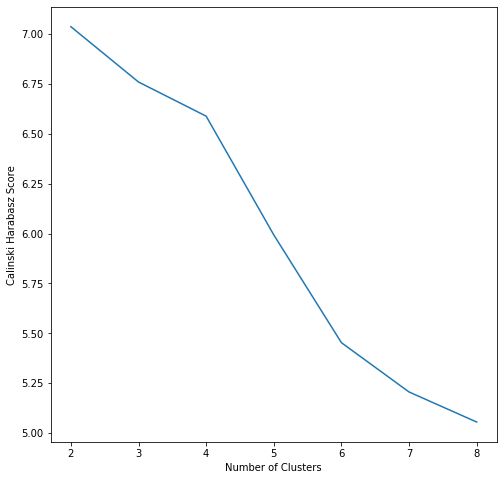

In [27]:
ch_score_vals = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(tfidf_df)
    cluster_assignments = kmeans.predict(tfidf_df)
    ch_score = calinski_harabasz_score(tfidf_df, cluster_assignments)
    ch_score_vals.append(ch_score)

plt.figure(figsize=(8,8))
plt.plot(list(range(2,9)), ch_score_vals)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')

In [28]:
def grab_espn_webpage(month, year):
    sess = Session()
    sess.mount('http://www.espn.com/nba/news/archive', 
               HTTPAdapter(max_retries=Retry(total=5, status_forcelist=[500, 503], backoff_factor=3)))
    
    url = f"http://www.espn.com/nba/news/archive/_/month/{month}/year/{year}"
    webpage = sess.get(url)
    
        
    soup_contents = BeautifulSoup(webpage.content,'lxml')
    
  
    headline_title_content = soup_contents.find_all("li")
    
    webpage_text = [headline_title_content[i].text for i in range(0,len(headline_title_content))] 
    
    headlines_dates = []
    for item in webpage_text:
        if '(' and ')' not in item:
            continue
        else:
            headlines_dates.append(item)
            
    headlines_only, dates_only = clean_headlines(headlines_dates)
    
    df_standard = pd.DataFrame({'headlines': headlines_only, 'posted_time': dates_only})
    df_standard['tokens'] = df_standard['headlines'].apply(lambda x: create_tokens(x))
    df_standard['posted_time'] = pd.to_datetime(df_standard['posted_time'], format='%B %d, %Y')
    
    return df_standard
            
    
    

In [30]:
#get ESPN headlines for an entire year
jan2016 = grab_espn_webpage('january', 2016)
feb2016 = grab_espn_webpage('february', 2016)
mar2016 = grab_espn_webpage('march', 2016)
apr2016 = grab_espn_webpage('april', 2016)

may2016 = grab_espn_webpage('may', 2016)
jun2016 = grab_espn_webpage('june', 2016)
jul2016 = grab_espn_webpage('july', 2016)
aug2016 = grab_espn_webpage('august', 2016)

sept2016 = grab_espn_webpage('september', 2016)
oct2016 = grab_espn_webpage('october', 2016)
nov2016 = grab_espn_webpage('november', 2016)
dec2016 = grab_espn_webpage('december', 2016)

In [43]:
#get ESPN headlines for an entire year

jan2017 = grab_espn_webpage('january', 2017)
feb2017 = grab_espn_webpage('february', 2017)
mar2017 = grab_espn_webpage('march', 2017)
apr2017 = grab_espn_webpage('april', 2017)

may2017 = grab_espn_webpage('may', 2017)
jun2017 = grab_espn_webpage('june', 2017)
jul2017 = grab_espn_webpage('july', 2017)
aug2017 = grab_espn_webpage('august', 2017)

sept2017 = grab_espn_webpage('september', 2017)
oct2017 = grab_espn_webpage('october', 2017)
nov2017 = grab_espn_webpage('november', 2017)
dec2017 = grab_espn_webpage('december', 2017)

In [56]:
jan2018 = grab_espn_webpage('january', 2018)
feb2018 = grab_espn_webpage('february', 2018)
mar2018 = grab_espn_webpage('march', 2018)
apr2018 = grab_espn_webpage('april', 2018)

may2018 = grab_espn_webpage('may', 2018)
jun2018 = grab_espn_webpage('june', 2018)
jul2018 = grab_espn_webpage('july', 2018)
aug2018 = grab_espn_webpage('august', 2018)

sept2018 = grab_espn_webpage('september', 2018)
oct2018 = grab_espn_webpage('october', 2018)
nov2018 = grab_espn_webpage('november', 2018)
dec2018 = grab_espn_webpage('december', 2018)

In [69]:
jan2019 = grab_espn_webpage('january', 2019)
feb2019 = grab_espn_webpage('february', 2019)
mar2019 = grab_espn_webpage('march', 2019)
apr2019 = grab_espn_webpage('april', 2019)

may2019 = grab_espn_webpage('may', 2019)
jun2019 = grab_espn_webpage('june', 2019)
jul2019 = grab_espn_webpage('july', 2019)
aug2019 = grab_espn_webpage('august', 2019)

sept2019 = grab_espn_webpage('september', 2019)
oct2019 = grab_espn_webpage('october', 2019)
nov2019 = grab_espn_webpage('november', 2019)
dec2019 = grab_espn_webpage('december', 2019)

In [70]:
jan2020 = grab_espn_webpage('january', 2020)
feb2020 = grab_espn_webpage('february', 2020)
mar2020 = grab_espn_webpage('march', 2020)
apr2020 = grab_espn_webpage('april', 2020)

may2020 = grab_espn_webpage('may', 2020)
jun2020 = grab_espn_webpage('june', 2020)
jul2020 = grab_espn_webpage('july', 2020)
aug2020 = grab_espn_webpage('august', 2020)

sept2020 = grab_espn_webpage('september', 2020)
oct2020 = grab_espn_webpage('october', 2020)
nov2020 = grab_espn_webpage('november', 2020)
dec2020 = grab_espn_webpage('december', 2020)

In [71]:
jan2021 = grab_espn_webpage('january', 2021)
feb2021 = grab_espn_webpage('february', 2021)

In [75]:
def calculate_ch_score(dataframe, month, year):
    
    tfidf = TfidfVectorizer(stop_words=stopwords)
    month_tfidf = tfidf.fit_transform(dataframe['headlines'])
    
    month_df = pd.DataFrame(month_tfidf.toarray())
    month_df.columns = tfidf.get_feature_names()
    
    ch_scores_list = []
    
    for k in range(2,9):
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans.fit(month_df)
        cluster_assignments = kmeans.predict(month_df)
        ch_score = calinski_harabasz_score(month_df, cluster_assignments)
        ch_scores_list.append(ch_score)
        
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(list(range(2,9)), ch_scores_list)
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel(f'Calinski Harabasz Score')
    ax.set_title(f'ESPN Headlines- {month} {year}')
    
    #return fig
    

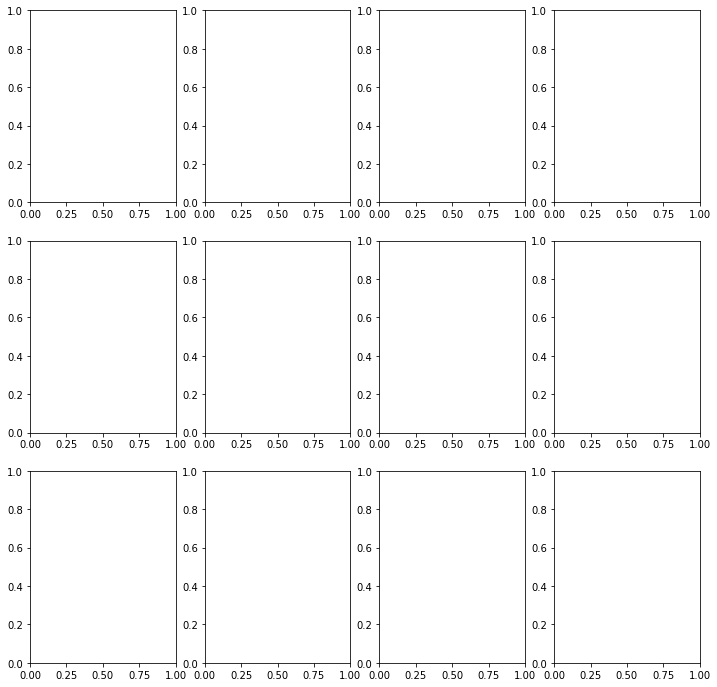

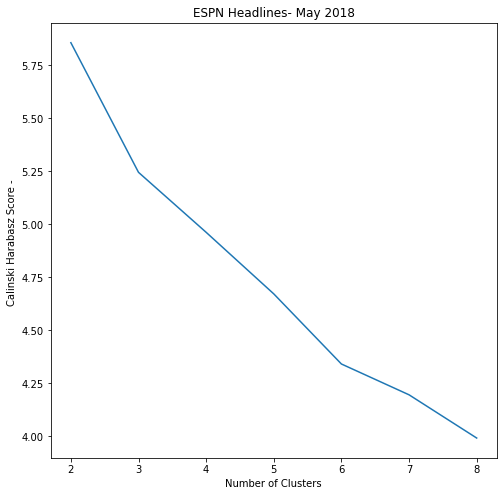

In [74]:
figure, axs = plt.subplots(3, 4, figsize=(12, 12))


In [ ]:
mar2019 = grab_webpage('march', 2019)

In [ ]:
mar2019.head()

In [ ]:
tfidf_vec2 = TfidfVectorizer(stop_words=stopwords)
mar_tfidf = tfidf_vec2.fit_transform(mar2019['headlines'])
mar_df = pd.DataFrame(mar_tfidf.toarray())
mar_df.columns = tfidf_vec2.get_feature_names()

In [ ]:
ch_score_vals_march19 = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(mar_df)
    cluster_assignments = kmeans.predict(mar_df)
    ch_score = calinski_harabasz_score(mar_df, cluster_assignments)
    ch_score_vals_march19.append(ch_score)

plt.figure(figsize=(8,8))
plt.plot(list(range(2,9)), ch_score_vals_march19)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')


In [ ]:
may2018 = grab_webpage('may', 2018)
tfidf_vec3 = TfidfVectorizer(stop_words=stopwords)
may_tfidf = tfidf_vec3.fit_transform(may2018['headlines'])
may_df = pd.DataFrame(may_tfidf.toarray())
may_df.columns = tfidf_vec3.get_feature_names()

In [ ]:
ch_score_vals_may18 = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(may_df)
    cluster_assignments = kmeans.predict(may_df)
    ch_score = calinski_harabasz_score(may_df, cluster_assignments)
    ch_score_vals_may18.append(ch_score)

plt.figure(figsize=(8,8))
plt.plot(list(range(2,9)), ch_score_vals_may18)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')

In [ ]:
website_xyz = requests.get("http://www.espn.com/nba/news/archive/_/month/june/year/2017")
print(website_xyz.status_code)
#soup_xyz = BeautifulSoup(headlines_page.content,'lxml')

In [ ]:
june17 = grab_espn_webpage('june', 2017)

In [ ]:
calculate_ch_score(may2018, 'May', 2018)